# Задание
1. Датасет о диабете: [Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
2. Загрузите выбранный датасет и выполните предварительную обработку данных. 
3. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
4. Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.
5. Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.
6. Исследование гиперпараметров:
    - Проведите исследование влияния гиперпараметров на производительность модели. Варьируйте следующие гиперпараметры:
        - Коэффициент обучения (learning rate).
        - Количество итераций обучения.
        - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).
7. Оценка модели:
    - Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1-Score.

Сделайте выводы о том, какие значения гиперпараметров наилучшим образом работают для данного набора данных и задачи классификации. Обратите внимание на изменение производительности модели при варьировании гиперпараметров.

# Ход работы

## Импортируем библиотеки

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import itertools
import pprint

## Загрузка данных

In [2]:
data = pd.read_csv('diabetes.csv')

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Обработка отсутствующих значений
Их нет :)

In [3]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)
rows_to_delete = data.isnull().any(axis=1).sum()
data = data.dropna()
print("Deleted rows:", rows_to_delete)

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Deleted rows: 0


## Визуализация данных

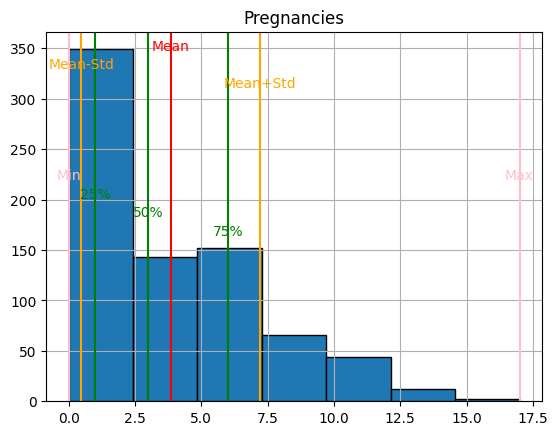

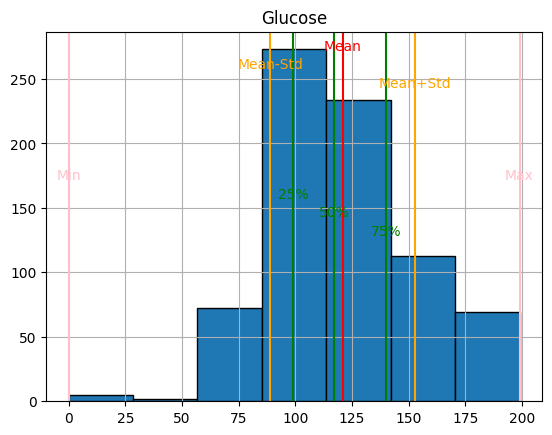

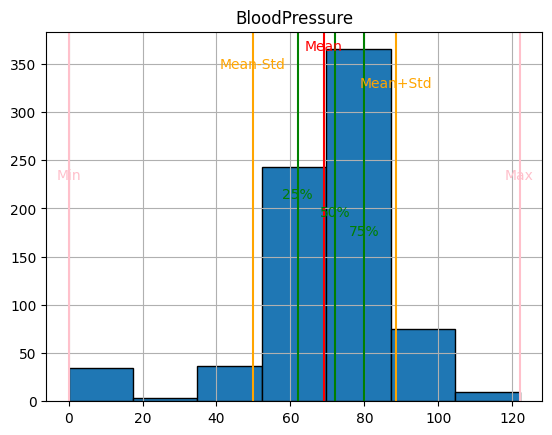

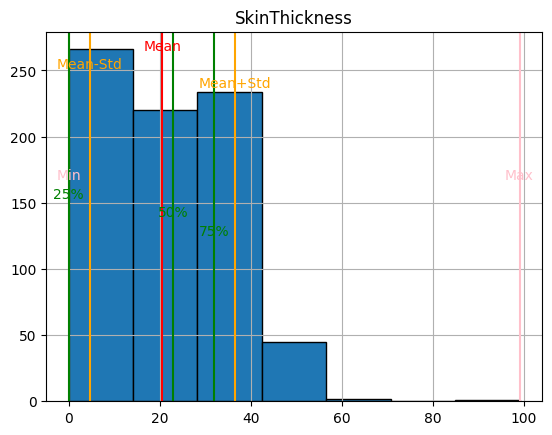

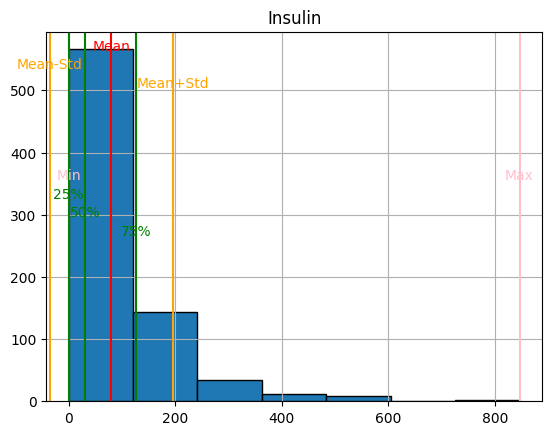

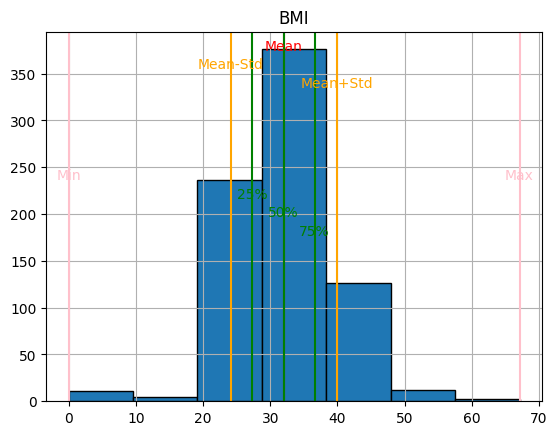

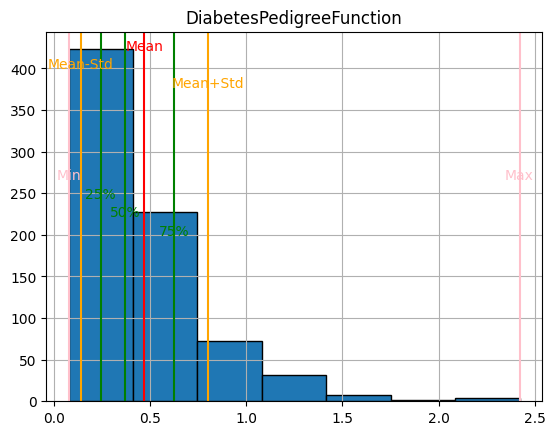

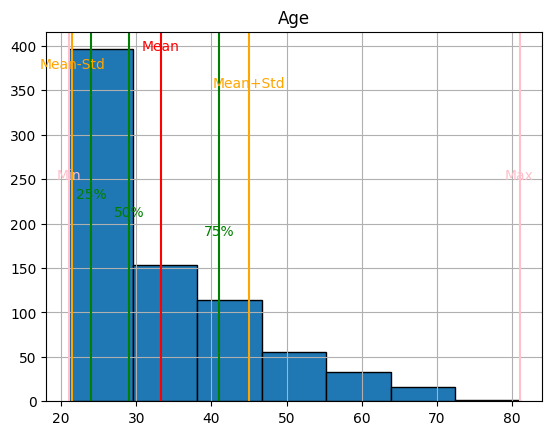

<Figure size 640x480 with 0 Axes>

In [7]:
description = data.describe()
bins_count = 1 + int(math.log(description[description.columns[0]]["count"]))
for column in description.columns:
    plt.figure()
    if column == 'Outcome':
        continue
    data[column].hist(bins=bins_count, edgecolor="black")
    
    mean = description[column]["mean"]
    std = description[column]["std"]
    min_value = description[column]["min"]
    p25 = description[column]["25%"]
    p50 = description[column]["50%"]
    p75 = description[column]["75%"]
    max_value = description[column]["max"]
    
    plt.title(column)
    
    plt.axvline(mean, color="red")
    plt.text(mean, plt.ylim()[1]*0.95, "Mean", ha="center", color="red")
    
    plt.axvline(mean-std, color="orange")
    plt.text(mean-std, plt.ylim()[1]*0.9, "Mean-Std", ha="center", color="orange")
    plt.axvline(mean+std, color="orange")
    plt.text(mean+std, plt.ylim()[1]*0.85, "Mean+Std", ha="center", color="orange")
    
    plt.axvline(min_value, color="pink")
    plt.text(min_value, plt.ylim()[1]*0.6, "Min", ha="center", color="pink")
    plt.axvline(max_value, color="pink")
    plt.text(max_value, plt.ylim()[1]*0.6, "Max", ha="center", color="pink")
    
    plt.axvline(p25, color="green")
    plt.text(p25, plt.ylim()[1]*0.55, "25%", ha="center", color="green")
    plt.axvline(p50, color="green")
    plt.text(p50, plt.ylim()[1]*0.5, "50%", ha="center", color="green")
    plt.axvline(p75, color="green")
    plt.text(p75, plt.ylim()[1]*0.45, "75%", ha="center", color="green")
    
    plt.show()

### Корреляционная матрица

Correlation matrix:
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   
Outcome                          0.22     0.47           0.07           0.07   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07  0.02                     -0.03  0.54   
Glucose                      

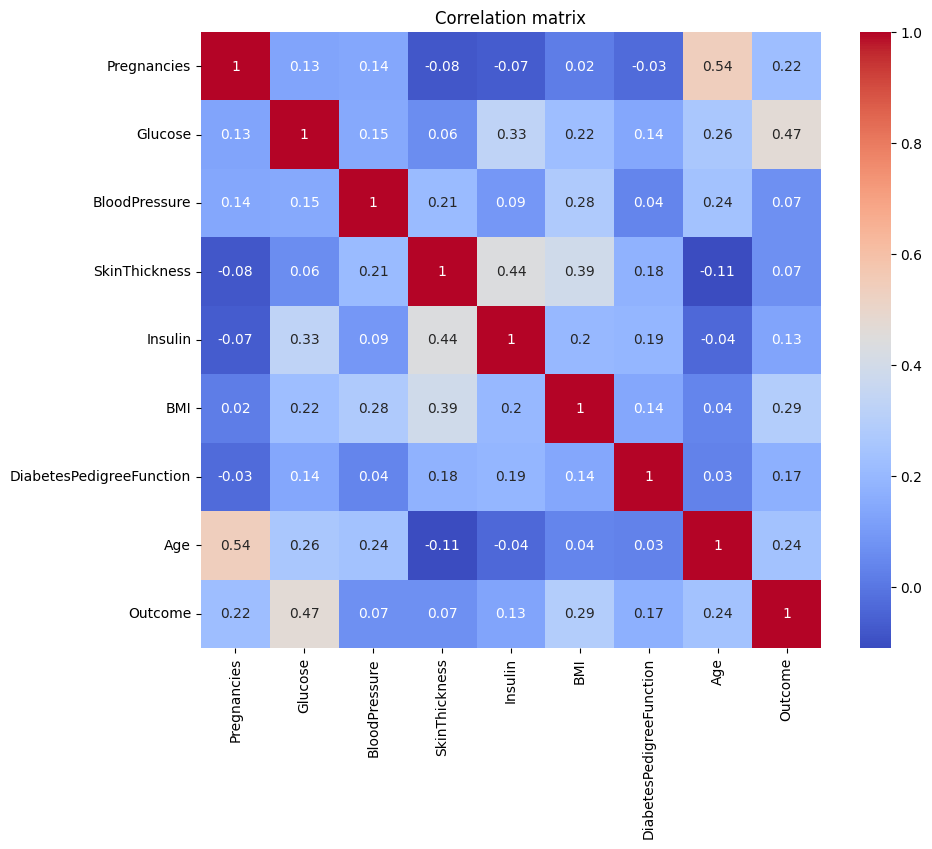

In [9]:
correlation_matrix = data.corr().round(2)
print("Correlation matrix:", correlation_matrix, sep="\n")

plt.figure(figsize=(10, 8))  # Увеличиваем размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

## Нормализация данных

In [10]:
data_norm = (data - data.mean()) / data.std()
print(data_norm)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigreeFunction       Age

In [22]:
def split_data(X, y, test_size=0.2, random_state=1):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]


X = data_norm.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = split_data(X, y)

## Логистическая регрессия

In [23]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, optimizer='gradient_descent', threshold=0.5):
        """
        Инициализация модели логистической регрессии.
        
        :param learning_rate: Коэффициент обучения
        :param iterations: Количество итераций для обучения
        :param optimizer: Метод оптимизации (по умолчанию - градиентный спуск)
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.optimizer = optimizer
        self.threshold = threshold
        self.weights = None
        self.bias = 0


    def sigmoid(self, z):
        """
        Сигмоида для вычисления вероятности.
        
        :param z: Линейная комбинация признаков
        :return: Значение сигмоиды
        """
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred):
        """
        Функция потерь - логарифмическая потеря.
        
        :param y_true: Истинные метки
        :param y_pred: Прогнозируемые метки
        :return: Значение логарифмической потери
        """
        m = len(y_true)
        epsilon = 1e-15  # Чтобы избежать деления на ноль
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return - (1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """
        Метод обучения модели.
        
        :param X: Признаки
        :param y: Мишень
        """
        m, n = X.shape
        self.weights = np.zeros(n)  # Инициализация весов
        self.bias = 0  # Инициализация смещения

        for _ in range(self.iterations):
            # Прогноз модели
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Градиенты
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)
            
            # Обновление параметров с использованием градиентного спуска
            if self.optimizer == 'gradient_descent':
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            elif self.optimizer == 'newton':
                # Метод Ньютона: вычисление гессиана и его инвертирование
                # Первая производная (градиент)
                grad_w = (1 / m) * np.dot(X.T, (y_pred - y))
                grad_b = (1 / m) * np.sum(y_pred - y)
                
                # Вторая производная (гессиан)
                # Диагональная матрица из y_pred * (1 - y_pred)
                hessian_w = (1 / m) * np.dot(X.T * y_pred * (1 - y_pred), X)
                hessian_b = (1 / m) * np.sum(y_pred * (1 - y_pred))
                
                # Обновление параметров с использованием метода Ньютона
                self.weights -= np.linalg.inv(hessian_w).dot(grad_w)
                self.bias -= grad_b / hessian_b  # Для скалярного смещения


    def predict(self, X):
        """
        Прогнозирование на новых данных.
        
        :param X: Признаки для прогнозирования
        :return: Прогнозированные значения (0 или 1)
        """
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return (y_pred >= self.threshold).astype(int)



## Генерация гиперпараметров

In [16]:
learning_rates = [1, 0.5, 0.1, 0.01, 0.001]
iterations = [10, 100, 1000, 10000]
optimizers = ['gradient_descent', 'newton']

parameter_combinations = list(itertools.product(learning_rates, iterations, optimizers))

## Функция оценки

In [17]:
def calculate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-15)
    precision = TP / (TP + FP + 1e-15)
    recall = TP / (TP + FN + 1e-15)
    
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-15)
    
    return accuracy, precision, recall, f1_score

## Исследование влияния гиперпараметров

In [27]:
# Преобразуем данные в NumPy массивы
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

results = []
for lr, i, opt in parameter_combinations:
    print(f"Model with parameters: learning_rate={lr}, iterations={i}, optimizer={opt}")
    model = LogisticRegression(learning_rate=lr, iterations=i, optimizer=opt)
    model.fit(X_train_np, y_train_np)
    y_pred = model.predict(X_test_np).astype(int)
    
    # Вычисляем метрики
    accuracy, precision, recall, f1_score = calculate_metrics(y_test_np, y_pred)
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 score: {f1_score:.3f}\n")
    
    model_description = {'learning_rate': lr,
                         'iterations': i,
                         'optimizer': opt,
                         'accuracy': accuracy,
                         'precision': precision,
                         'recall': recall,
                         'f1_score': f1_score}
    
    results.append(model_description)

Model with parameters: learning_rate=1, iterations=10, optimizer=gradient_descent
Accuracy: 0.765
Precision: 0.732
Recall: 0.545
F1 score: 0.625

Model with parameters: learning_rate=1, iterations=10, optimizer=newton
Accuracy: 0.778
Precision: 0.756
Recall: 0.564
F1 score: 0.646

Model with parameters: learning_rate=1, iterations=100, optimizer=gradient_descent
Accuracy: 0.778
Precision: 0.756
Recall: 0.564
F1 score: 0.646

Model with parameters: learning_rate=1, iterations=100, optimizer=newton
Accuracy: 0.778
Precision: 0.756
Recall: 0.564
F1 score: 0.646

Model with parameters: learning_rate=1, iterations=1000, optimizer=gradient_descent
Accuracy: 0.778
Precision: 0.756
Recall: 0.564
F1 score: 0.646

Model with parameters: learning_rate=1, iterations=1000, optimizer=newton
Accuracy: 0.778
Precision: 0.756
Recall: 0.564
F1 score: 0.646

Model with parameters: learning_rate=1, iterations=10000, optimizer=gradient_descent
Accuracy: 0.778
Precision: 0.756
Recall: 0.564
F1 score: 0.646


## Выбор лучшей модели
Будем отбирать в таком приоритете:
- чем больше f1_score тем лучше
- чем больше accuracy тем лучше
- чем меньше iterations тем лучше
- gradient_descent лучше newton

In [31]:
sorted_results = sorted(results, key=lambda x: (
        -x['f1_score'],       # Чем выше f1_score, тем лучше
        -x['accuracy'],       # Чем выше accuracy, тем лучше
        x['iterations'],      # Чем меньше iterations, тем лучше
        x['optimizer'] == 'gradient_descent'  # 'gradient_descent' предпочтительнее
    ))

pprint.pprint(sorted_results[0])

{'accuracy': 0.7973856209150327,
 'f1_score': 0.7047619047619043,
 'iterations': 10,
 'learning_rate': 0.01,
 'optimizer': 'gradient_descent',
 'precision': 0.74,
 'recall': 0.6727272727272727}
